In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def addOne(A, n):
    # Given an n x n matrix A, add another layer to it.
    if n%2 == 1: # n is odd
        newCol = []
        for i in range(n-1, -1, -1): # add 1 more value to each existing row
            newCol.append(n**2 + 1 + i)
        A = np.column_stack((A, newCol))
        #print(A)
        # Add the extra row above
        newRow = np.arange(n**2 + 2*n + 1, n**2 + n, -1)
        A = np.row_stack([newRow, A])
    else:
        newCol = []
        for i in range(n): # add 1 more value to each existing row
            newCol.append(n**2 + 1 + i)
        A = np.column_stack((newCol, A))
        # Add the extra row below
        newRow = np.arange(n**2 + n + 1, n**2 + 2*n + 2)
        A = np.vstack((A, newRow))
        
    return A

In [3]:
A = [[5,4,3], [6,1,2], [7,8,9]]
A4 = addOne(A, 3)
print(A4)

[[16 15 14 13]
 [ 5  4  3 12]
 [ 6  1  2 11]
 [ 7  8  9 10]]


In [4]:
A5 = addOne(A4, 4)
print(A5)

[[17 16 15 14 13]
 [18  5  4  3 12]
 [19  6  1  2 11]
 [20  7  8  9 10]
 [21 22 23 24 25]]


In [5]:
A6 = addOne(A5, 5)
print(A6)

[[36 35 34 33 32 31]
 [17 16 15 14 13 30]
 [18  5  4  3 12 29]
 [19  6  1  2 11 28]
 [20  7  8  9 10 27]
 [21 22 23 24 25 26]]


In [6]:
A7 = addOne(A6, 6)
print(A7)

[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]


In [7]:
def extendFig(A, N):
    # Given the 3x3 matrix A as in the problem and extend it to dim N
    newA = A
    for i in range(N-3):
        newA = addOne(newA, 3+i)
    return newA

In [8]:
A = [[5,4,3], [6,1,2], [7,8,9]]
new = extendFig(A, 11)
for i in range(11):
    print(new[i])

[101 100  99  98  97  96  95  94  93  92  91]
[102  65  64  63  62  61  60  59  58  57  90]
[103  66  37  36  35  34  33  32  31  56  89]
[104  67  38  17  16  15  14  13  30  55  88]
[105  68  39  18   5   4   3  12  29  54  87]
[106  69  40  19   6   1   2  11  28  53  86]
[107  70  41  20   7   8   9  10  27  52  85]
[108  71  42  21  22  23  24  25  26  51  84]
[109  72  43  44  45  46  47  48  49  50  83]
[110  73  74  75  76  77  78  79  80  81  82]
[111 112 113 114 115 116 117 118 119 120 121]


In [9]:
zs = np.ravel(new)

In [10]:
x = np.arange(-5,6)
y = np.ones(11)

In [11]:
xs, ys = [], []
for i in range(11):
    xs.append(x)
    ys.append(y * (5-i))

In [12]:
xs = np.ravel(xs)
ys = np.ravel(ys)

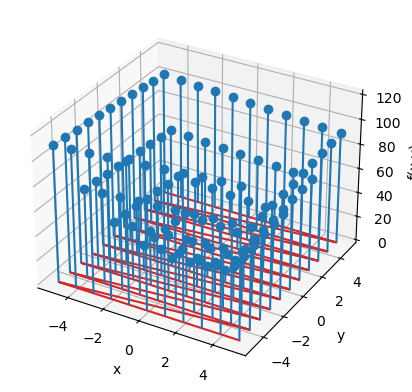

In [13]:
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, zs)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

plt.show()

In [14]:
def LOS(n):
    # Return the greatest odd square smaller than n.
    f = int(np.floor(np.sqrt(n)))
    if n==0:
        return np.nan
    if f%2 == 1:
        return f
    else:
        return f-1
    
LOS(32)

5

In [15]:
def findCoor(n):
    # Given natural number n, find its coordinates according to the pattern.
    los = LOS(n)
    xcoor = int((los-1)/2)
    ycoor = int(-xcoor)
    steps = n - los**2
    laps = steps//(los+1)
    
    if los**2 == n:
        return (xcoor, ycoor)
    
    if laps == 0:
        xcoor += 1
        ycoor += steps - 1
    elif laps == 1:
        ycoor += los
        xcoor -= steps - los - 2
    elif laps == 2:
        xcoor -= los
        ycoor += los - (steps - 2*los - 2)
    else:
        ycoor -= 1
        xcoor -= 4*los - steps + 3
    return (xcoor, ycoor)

findCoor(23)

(0, -2)

In [16]:
def findNum(a, b):
    # Given coordinates (a,b), find the number written on it according to the pattern.
    k = max(abs(a), abs(b))
    
    if a == -b and a >= 0: # Bottom Right
        return (2*a + 1)**2 
    elif a == b and a>= 0: # Top Right
        return (2*k + 1)**2 - 6 * k 
    elif a == -b and a <= 0: # Top left
        return (2*k + 1)**2 - 4 * k 
    elif a == b and a <= 0: # Bottom left
        return (2*k + 1)**2 - 2*k
    
    cand = (2*k+1)**2
    if a == k:
        cand -= 6*k + (k-b)
        return cand
    elif b == k:
        cand -= 6*k - (k-a)
        return cand 
    elif a == -k:
        cand -= 4*k - (k - b)
        return cand
    elif b == -k:
        return (cand - (k-a))

findNum(-5, 3)
    

103

In [17]:
# Check: for 2nd and 4th case
print(findNum(-3,5)) # 99
print(findNum(3,5)) # 93
print(findNum(3, -5)) # 119
print(findNum(-3,-5)) # 113 
print(findNum(5, -5)) # 121

99
93
119
113
121


In [18]:
# Check: for 1st and 3rd case
print(findNum(5,3)) # 89
print(findNum(-5, 3)) # 103
print(findNum(-5, -3)) # 109
print(findNum(5, -3)) # 83
print(findNum(-3, 4)) # 64

89
103
109
83
64


In [19]:
# Check: for 1st and 3rd case
print(findNum(4,2)) # 55
print(findNum(-4, 2)) # 67
print(findNum(-4, -2)) # 71
print(findNum(4, -2)) # 51

55
67
71
51


In [23]:
# Check that findCoor is the inverse of findNum and vice versa
(a,b) = findCoor(243)
findNum(a,b)

243